# Question 1

צור מטריצה בגודל 50x50 שכל איבר בה מתפלג גאוסיינית עם ממוצע 3 וסטיית תקו 7 .הצג
את המטריצה כתמונת רמות אפור דו- ממדית. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.stats as stats

%matplotlib notebook

ModuleNotFoundError: No module named 'cv2'

<IPython.core.display.Javascript object>


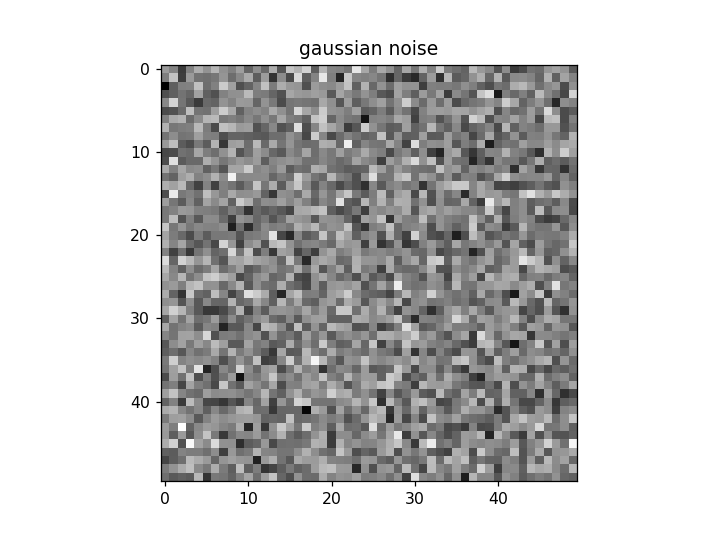

In [301]:
# 1a
# using mean 3 and standart diviation of 7
mu, std = 3, 7
# create 50x50 matrix of gaussian distibution
gaussian = np.random.normal(mu, std, (50, 50))
plt.figure()
plt.imshow(gaussian, cmap='gray')
plt.title("gaussian noise")
plt.savefig("gaussianNoise.png")

 (b)
 
 )צייר את ההיסטוגרמה של המטריצה מ -)a ,)השווה לפונקציית הפילוג המתאימה

<IPython.core.display.Javascript object>


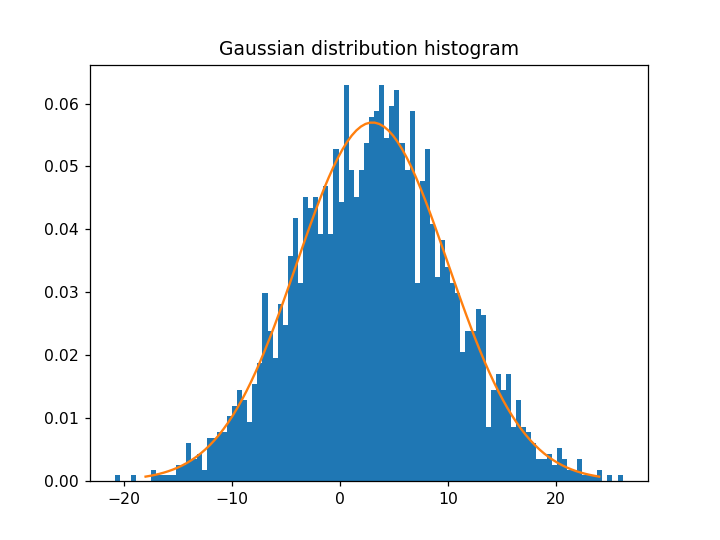

In [302]:
# 1b
plt.figure()
# flatten the matrix to vector
flatG = gaussian.flatten()
# create density histogram of 100 bins
hist = plt.hist(flatG, bins=100, density=True)

x = np.linspace(mu - 3*std, mu + 3*std, 100)
plt.plot(x, stats.norm.pdf(x, mu, std))

plt.title("Gaussian distribution histogram")
plt.savefig('Gaussian distribution histogram.png')

c)

בסעיפים הבאים יש להשתמש בתמונה צבעונית כלשהיא. קראו את התמונה מהזיכרון והציגו
אותה כתמונה צבעונית ותמונת רמות אפור. 

<IPython.core.display.Javascript object>


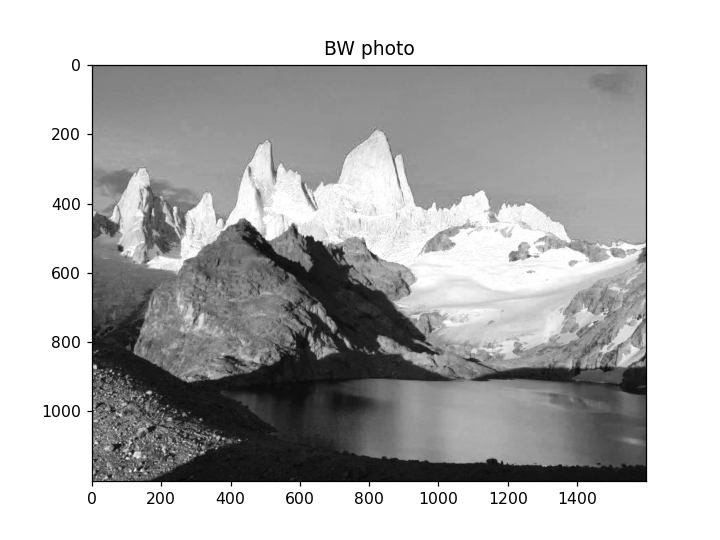

In [288]:
# 1c

image = cv2.imread("22.jpg", )
plt.figure()
# BGR to HSV then choose value parameter of each pixel to represnt bw picture
bwImg = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,2]
plt.imshow(bwImg, cmap='gray')
plt.title("BW photo")
plt.savefig("BWPhoto.png")

d) Canny edge detector different parameters vs. sobel

<IPython.core.display.Javascript object>


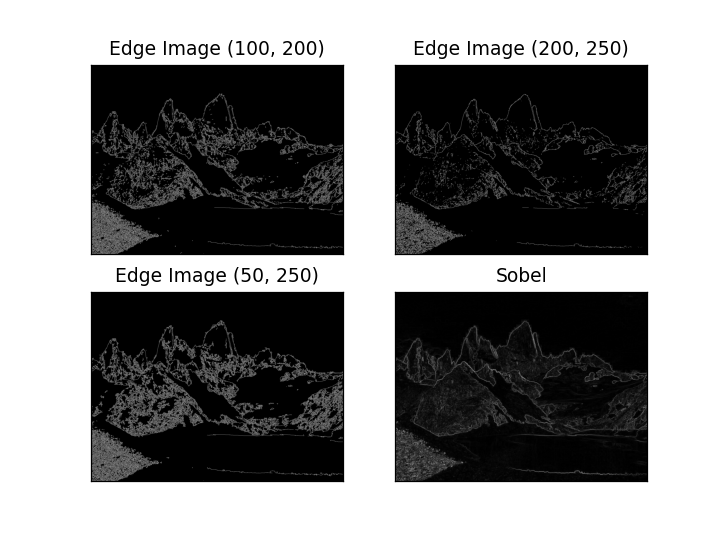

In [292]:
# 1d

# canny edge ditector with different thresholds
edges1 = cv2.Canny(bwImg,100,200)
edges2 = cv2.Canny(bwImg,200,250)
edges3 = cv2.Canny(bwImg,50,250)

# sobel
sobelx = cv2.Sobel(bwImg,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(bwImg,cv2.CV_64F,0,1,ksize=5)


plt.figure()
plt.subplot(221),plt.imshow(edges1,cmap = 'gray')
plt.title('Edge Image (100, 200)'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges2,cmap = 'gray')
plt.title('Edge Image (200, 250)'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(edges3,cmap = 'gray')
plt.title('Edge Image (50, 250)'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(np.sqrt(sobelx*sobelx + sobely*sobely),cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.savefig("edgeDitector.png")

<IPython.core.display.Javascript object>


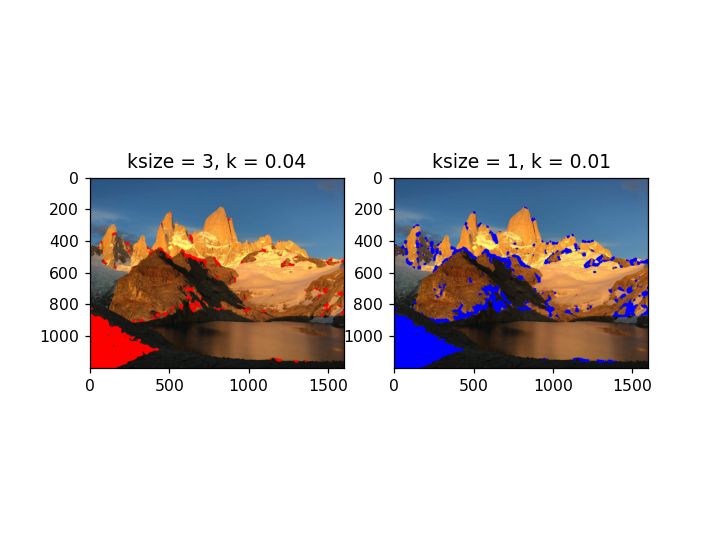

In [296]:
# 1e
# harris corners
crnr = np.copy(img)
corner = cv2.cornerHarris(bwImg,20, 3, 0.04)
corner2 = cv2.cornerHarris(bwImg,20, 1, 0.01)
plt.figure()
plt.clf()
crnr[corner>0.04*corner.max()]=[255,0, 0]
plt.subplot(121), plt.imshow(crnr)
plt.title("ksize = 3, k = 0.04")
crnr = np.copy(img)
crnr[corner>0.01*corner2.max()]=[0, 0, 255]
plt.subplot(122), plt.imshow(crnr)
plt.title("ksize = 1, k = 0.01")
plt.savefig("HarrisCorners.png")